In [1]:
from netCDF4 import Dataset
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib as mpl
import matplotlib.cm  as cm
import matplotlib.pyplot as plt
import matplotlib.gridspec as grid_spec

import plot_recipes as pr

In [5]:
speed = {}
direction = {}
temperature = {}

for y in range(2011,2020):
    if y == 2013:
        continue
        
    with Dataset(f'../netcdf/{y}/aquadopp.nc', 'r') as nc:
        print(nc.variables)
        speed[y] = np.array(nc['HCSP'][:])
        direction[y] = np.array(nc['HCDT'][:])
        temperature[y] = np.array(nc['TEMP'][:])

{'TIME': <class 'netCDF4._netCDF4.Variable'>
float64 TIME(time)
    long_name: Julian day (UTC) of the station relative to 1950-01-01 00:00:00 UTC
    standard_name: time
    reference_date: 1950-01-01 00:00:00 UTC
    units: days
    conventions: Relative julian days with decimal part (as parts of day)
    axis: T
unlimited dimensions: time
current shape = (54096,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'HCSP': <class 'netCDF4._netCDF4.Variable'>
float32 HCSP(time)
    long_name: Horizontal current speed
    standard_name: sea_water_speed
    units: m s-1
    valid_min: 0.0
    valid_max: 9.0
unlimited dimensions: time
current shape = (54096,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'HCDT': <class 'netCDF4._netCDF4.Variable'>
float32 HCDT(time)
    long_name: Current to direction relative true north
    standard_name: direction_of_sea_water_velocity
    units: deg
    valid_min: 0.0
    valid_max: 360.0
unlimited dimensions: time
current sh

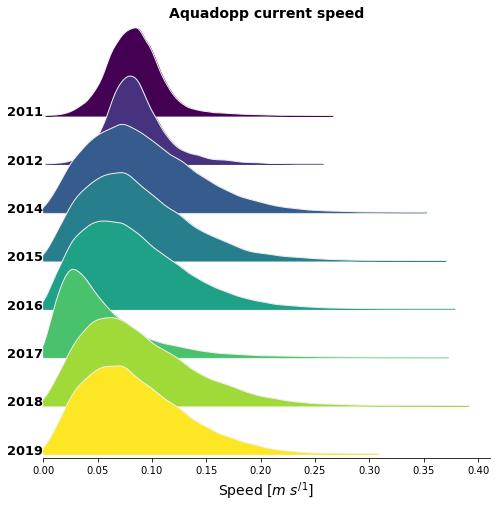

In [3]:
pr.ridge_plot(speed,
              xlabel=r'Speed [$m \ s^{/1}$]',
              title='Aquadopp current speed',
              cmap='viridis')

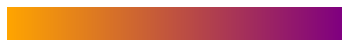

In [4]:
Opurple = pr.custom_cmap(['orange', 'purple'])
pr.display_cmap(Opurple)

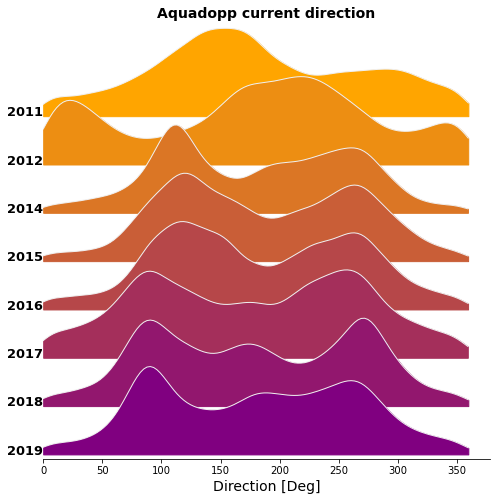

In [5]:
pr.ridge_plot(direction,
                 xlabel='Direction [Deg]',
                 title='Aquadopp current direction',
                 cmap=Opurple)

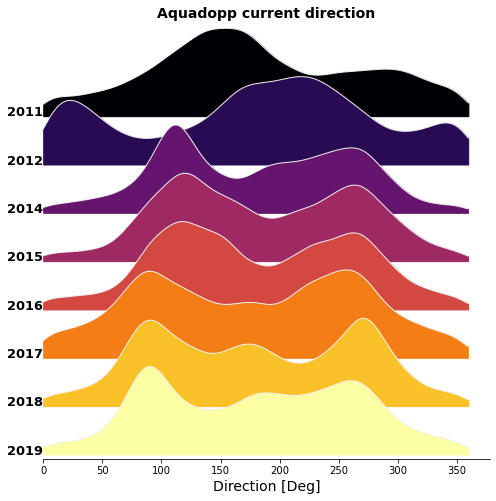

In [6]:
pr.ridge_plot(direction,
                 xlabel='Direction [Deg]',
                 title='Aquadopp current direction',
                 cmap='inferno')

> OBS: how is oriented the instrument? Where is the North in for the instrument? It might be useful to see the different placement of the mooring compared with this plot.

In [7]:
blured = pr.custom_cmap(['blue', 'red'])

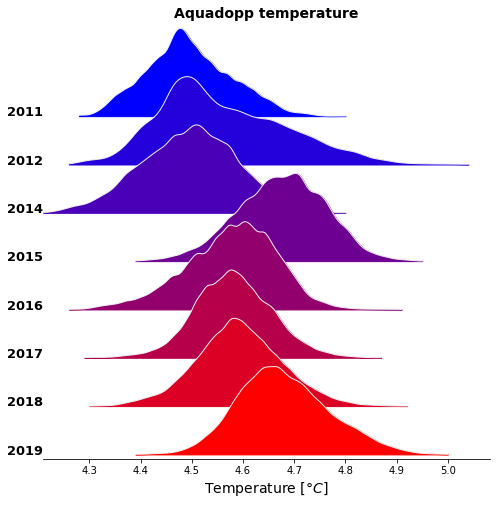

In [8]:
pr.ridge_plot(temperature,
              xlabel=r'Temperature [$\degree C$]',
              title='Aquadopp temperature',
              cmap=blured)

> Why is 2015 deviated? Is it related to mooring position? 2019 appears to be warmer on average than the rest of the years.

# Fourier decomposition 

In [9]:
temperature[2011]

array([4.56, 4.54, 4.53, ..., 4.34, 4.34, 4.46], dtype=float32)

In [10]:
temp_fft = np.fft.rfft(temperature[2011])

/Users/claudiopierard/miniconda3/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


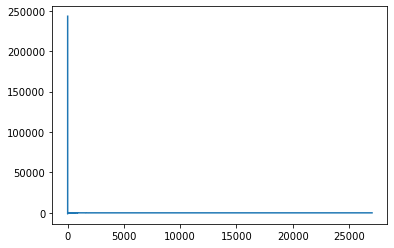

In [14]:
plt.plot(temp_fft)